**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [1]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
#加载result.csv这个数据
result = pd.read_csv('./result.csv')
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

In [3]:
#思考回答
#这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号b
# 蕞基本的可视化图案有:折线图，柱状图，条形图，饼图，散点图等等
# 折线图：展示数据随时间或有序类别的波动情况的趋势变化。
# 柱状图：展示多个分类的数据变化和同类别各变量之间的比较情况。
# 条形图：类似柱状图，只不过两根轴对调了一下。适用于类别名称过长，将有大量空白位置标示每个类别的名称。
# 饼图：用来展示各类别占比，比如男女比例。
# 散点图：用于发现各变量之间的关系。

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

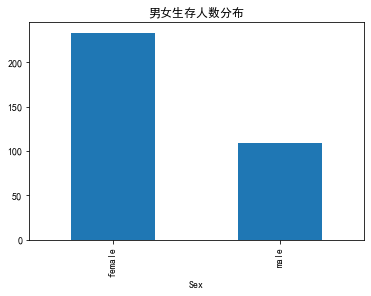

In [4]:
#代码编写

result.groupby('Sex')['Survived'].sum().plot.bar()
plt.title('男女生存人数分布')
plt.show()

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

In [5]:
#思考题回答

# 最直观的感觉就是女性比男性的存活高，不一定是性别影响存活率，更多的可能是发生事故后先给予女士和孩子救援，才有了这样的结果
# 下面试试男女死亡人数的展示

In [6]:
a = result[result.Survived==0]
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


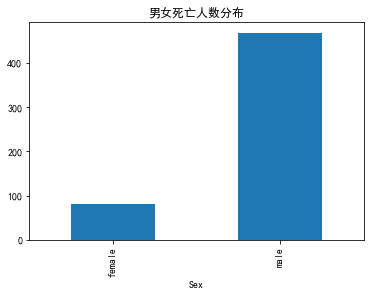

In [7]:
a.groupby('Sex')['Survived'].count().plot.bar()
plt.title('男女死亡人数分布')
plt.show()

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

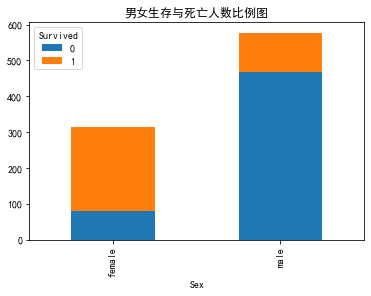

In [8]:
#代码编写
# 提示：计算男女中死亡人数 1表示生存，0表示死亡

result.groupby('Sex')['Survived'].value_counts().unstack().plot.bar(stacked='True')
plt.title('男女生存与死亡人数比例图')
plt.show()


【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

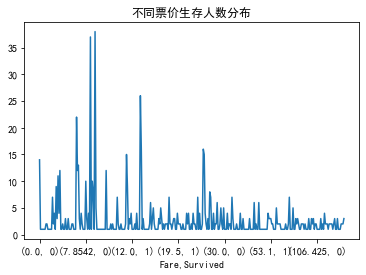

In [9]:
#代码编写
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡

result.groupby('Fare')['Survived'].value_counts().plot()
plt.title('不同票价生存人数分布')
plt.show()


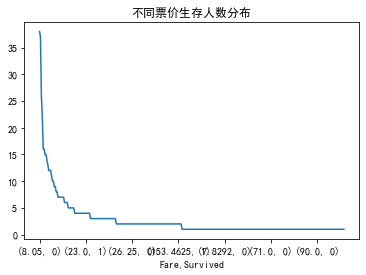

In [10]:
result.groupby('Fare')['Survived'].value_counts().sort_values(ascending=False).plot()  # 排序后
plt.title('不同票价生存人数分布')
plt.show()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

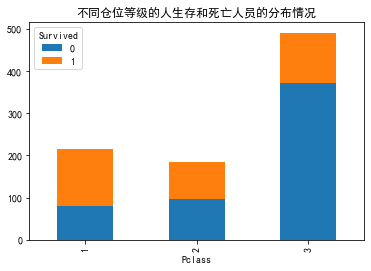

In [11]:
#代码编写
# 1表示生存，0表示死亡

result.groupby('Pclass')['Survived'].value_counts().unstack().plot.bar(stacked='True')
plt.title('不同仓位等级的人生存和死亡人员的分布情况')
plt.show()


【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

In [12]:
#思考题回答

# 图形展示能直观理解，但是需要用对表达方式

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

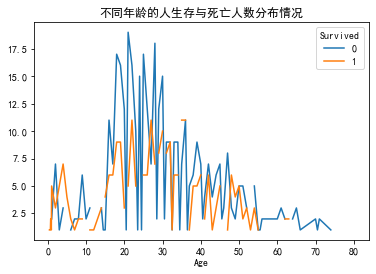

In [13]:
#代码编写

result.groupby('Age')['Survived'].value_counts().unstack().plot()
plt.title('不同年龄的人生存与死亡人数分布情况')
plt.show()

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


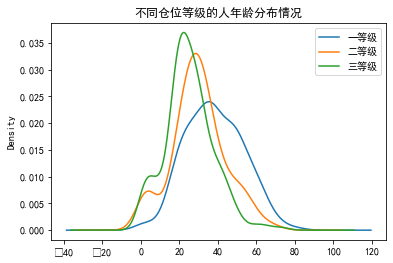

In [14]:
#代码编写

result['Age'][result['Pclass']==1].plot(kind='kde')
result['Age'][result['Pclass']==2].plot(kind='kde')
result['Age'][result['Pclass']==3].plot(kind='kde')
plt.title('不同仓位等级的人年龄分布情况')
plt.legend(['一等级','二等级','三等级'])
plt.show()

【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

In [15]:
#思考题回答

# 可以看看不同港口人数存亡情况

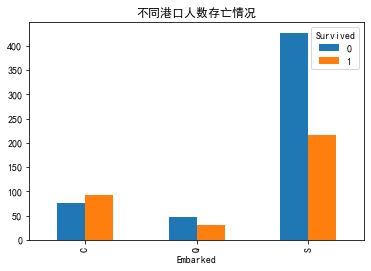

In [16]:
result.groupby('Embarked')['Survived'].value_counts().unstack().plot.bar()
plt.title('不同港口人数存亡情况')
plt.show()

【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？